# Titanic Data 

In [1]:
from IPython.display import HTML

HTML('''<style>
div.rendered_html {
background-color: lightblue;
 }
</style>
''')

<p><b>Introduction</b>
<br/>For the final project, you will conduct your own data analysis and create a file to share that documents your findings. You should start by taking a look at your dataset and brainstorming what questions you could answer using it. Then you should use Pandas and NumPy to answer the questions you are most interested in, and create a report sharing the answers. You will not be required to use statistics or machine learning to complete this project, but you should make it clear in your communications that your findings are tentative. This project is open-ended in that we are not looking for one right answer.</p>

<p><b>Titanic Data</b> 
<br/>Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.</p>
<a href="https://review.udacity.com/#!/rubrics/107/view" target="_blank">Project Rubric</a>

In [2]:
import pandas as pd #pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools 
import numpy as np #NumPy is the fundamental package for scientific computing with Python
import matplotlib.pyplot as plt # Provides a MATLAB-like plotting framework.
import seaborn as sns # Seaborn: statistical data visualization
sns.set_style('darkgrid')
import scipy.stats as sp
%matplotlib inline
pd.options.mode.chained_assignment = None #

In [3]:
def compute_chi2(df,indep_var,dep_var):
    """Tests whether the distribution of sample categorical data matches an expected distribution.
    prints out frequency table, chi2 test statistic, and p-value
    Parameters:
    -------
    df : pd.dataframe
    indep_var : pd.dataframe independent variable - x - axis
    dep_var : pd.dataframe dependent variable - y - axis
    
    Return:
    -------
    None. 
    """
    freqtab = pd.crosstab(df[indep_var],df[dep_var])
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("======{0} vs {1}========".format(indep_var,dep_var))
    
    indep_var_mean = df[indep_var].mean()
    observed = df.groupby(dep_var).sum()[indep_var]
    expected = df.groupby(dep_var).count()[indep_var]*indep_var_mean
    chi2_stat,pvalue = sp.stats.chisquare(observed,expected,ddof=0)
    crit = sp.chi2.ppf(q=.05, df=2)
    print("ChiSquare test statistic   = {0:3f}".format(chi2_stat))
    print("p-value                    = {0:.20f}".format(pvalue))
    print("Critical Value (.05 alpha) = {0:.3f}".format(crit))
    print("============================")
    return

# Wrangling and exploration

In [4]:
# Read the data set, 
# assumption : csv file exists in same parent directory from which notebook is running.
titanic_data = pd.read_csv("titanic-data.csv")

#Dimensionality of the DataFrame.
print("Shape <titanic_data> = {0}".format(titanic_data.shape))
titanic_data.head()

Shape <titanic_data> = (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3 - Analyze Your Data<br/>
Brainstorm some questions you could answer using the data set you chose, then start answering those questions. Here are some ideas to get you started:<br/><br/>
<b>Titanic Data</b><br/>
Q1. What factors made people more likely to survive? (Factors like: age, sex, and class can be analyzed.) To what extent each factor affected the survival?<br/>
Q2. Did passengers that traveled alone have a higher chance of survival than passengers that traveled as a family?<br/>
Q3. Does passengers' cabin location help to predict survival?<br/>

In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From above sample data, below data points were collected:<br/>
   1. The most aged passenger was 80 years old.<br/>
   2. The highest fare was $512.32920.<br/>
   3. The average age of the passenger was 29.69 years. (This is unaffected by few records have value for age attribute missing)<br/>
   4. The mean survival rate was 0.3838 where 1='Survived' and 0='Not Survived'.<br/>


Above analysis of describe shows for numerical attribute 'Age' the count < 891,which suggest some values are either missing or NaN for this column.

In [6]:
total_pass = 891.0
nonmissing_rows=len(titanic_data.dropna())
missing_data_rows = total_pass - nonmissing_rows
print ('{0} = {1:0.0f}'.format('missing_data_rows', missing_data_rows))

##Finding percentage of missing data

percent_misssing_data =100- len(titanic_data.dropna())*1.0/len(titanic_data)* 100
print ('{0} = {1:0.2f}%'.format('percent_misssing_data', percent_misssing_data))

missing_data_rows = 708
percent_misssing_data = 79.46%


In [7]:
missing_cabindata_rows = len(titanic_data['Cabin']) - titanic_data['Cabin'].count()
print ('{0} = {1:0.0f}'.format('missing_cabindata_rows', missing_cabindata_rows))

missing_agedata_rows = len(titanic_data['Age']) - titanic_data['Age'].count()
print ('{0} = {1:0.0f}'.format('missing_agedata_rows', missing_agedata_rows))

missing_cabindata_rows = 687
missing_agedata_rows = 177


79.46 percent of the records have some missing entries, all these records cannot be removed just because some entries are missing. Also out of the 708/891 rows that contain missing records, the attribute that is missing in the majority of rows i.e. 687 rows is the Cabin data which does not affect the analysis much and hence, the missing data is not removed or dealt with.

Q1. What factors made people more likely to survive? (Factors like: age, sex, and class can be analyzed.)<br/>
To what extent each factor affected the survival?<br/>
  1. Is there a statistical difference between the overall survival rate and the survival rate for men and women?<br/>
  2. Is there a statistical difference between the overall survival rate and the survival rate for passengers in each class?

<b>Lets analyse age factor</b><br/>
Validating against total passengers' count : Total count(891) = Count where Age is present(714) + Count where Age is missing(177)
<br/>titanic_data_age_valid will be used for further analysis of age variable where records containing invalid age are removed.

In [8]:
total_count = len(titanic_data)
titanic_data_age_valid = titanic_data.dropna(subset=["Age"])

age_present_count = len(titanic_data_age_valid)
age_missing_count = len(titanic_data[titanic_data['Age'].isnull()]['Age'])

assert (total_count == age_present_count + age_missing_count)

print("TOTAL COUNT = {0} \nCOUNT where Age is present = {1} , COUNT where Age is missing = {2} \
      \nValidation (COUNT Match) = {3} " \
      .format(len(titanic_data), age_present_count, \
        age_missing_count,total_count == age_present_count + age_missing_count))
print("Shape <titanic_data_age_valid> = {0}".format(titanic_data_age_valid.shape))
print("Median <titanic_data_age_valid> = {0}".format(titanic_data_age_valid.Age.median()))

TOTAL COUNT = 891 
COUNT where Age is present = 714 , COUNT where Age is missing = 177       
Validation (COUNT Match) = True 
Shape <titanic_data_age_valid> = (714, 12)
Median <titanic_data_age_valid> = 28.0


<b> Plotting univariate distributions </b>

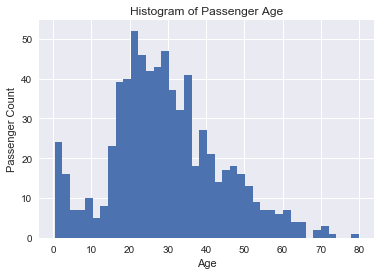

In [9]:
titanic_data_age_valid.Age.hist(bins=40,stacked = False,histtype ="bar")
plt.xlabel("Age")
plt.ylabel("Passenger Count")
plt.title("Histogram of Passenger Age");

Histogram of Passenger Age will have an almost normal distribution if there isn't a peak around 1-5 year old.<br/>
1. The oldest passenger is 80 years old.<br/>
2. The earlier statistics show that median is 28 year old, and mean is 29 year old<br/>
3. Overall the plot tells us that the passengers' age is distributed around 20-40's. <br/>

Let's see if the distribution of the age is actually different between whether or not the passengers have survived.
http://www.datavizcatalogue.com/methods/violin_plot.html
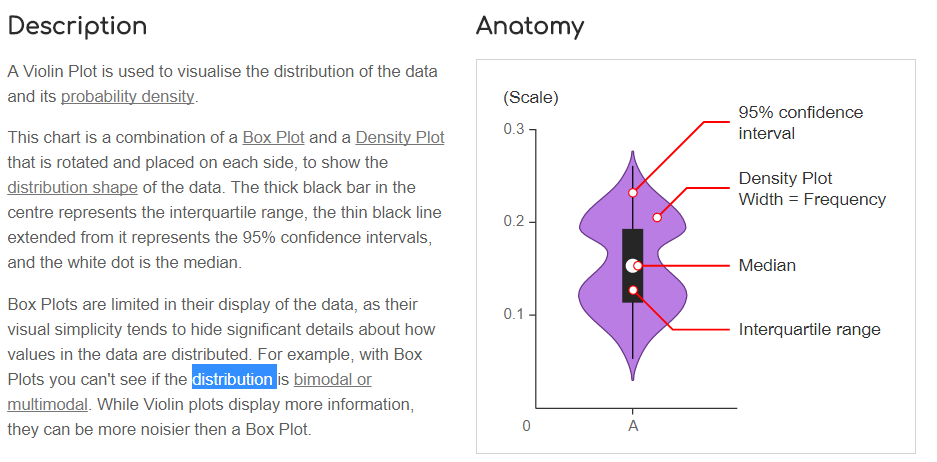

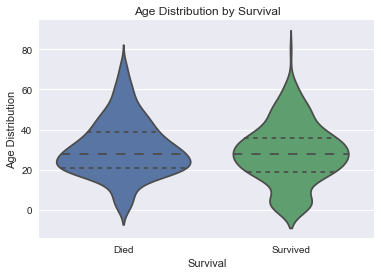

In [10]:
p = sns.violinplot(data = titanic_data_age_valid, x = 'Survived', y = 'Age',inner="quart")
p.set(title = 'Age Distribution by Survival', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived']);

In [11]:
titanic_data_age_valid.groupby('Survived').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


The distribution of the age shows bimodal distribution of people who survived.<br/>
Many old people died from the tragedy, though we see 1 80 year-old man did survive the tragedy<br/>
Many children survived the accident when compared to the children who didn't.<br/>
Children who died have minimum age of 1 year, but children who survived have min age of 0.42 i.e 5 months<br/>
This make sense as children and women are prioritized to get to the lifeboat.<br/>

In [12]:
#Interesting fact
titanic_data_age_valid[(titanic_data_age_valid.Survived == 1) & (titanic_data_age_valid.Age == 80)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


Details for this passenger can be found here: 
https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html
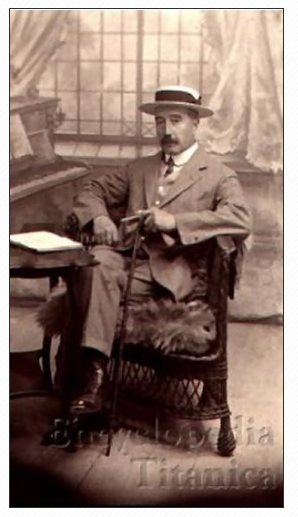

Lets analyse if  women and children survival rate is higher than those who didn't?

In [13]:
#Creating new column named WomenandChildren having age <=12 and have sex=female.
titanic_data_age_valid['WomenandChildren'] = \
    np.where((titanic_data_age_valid.Age <= 12) | (titanic_data_age_valid.Sex == 'female'),1,0)
titanic_data_age_valid.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WomenandChildren
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


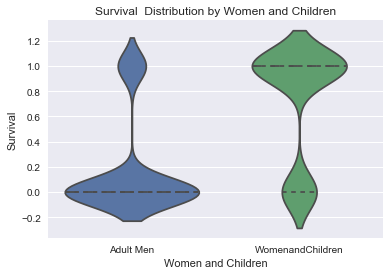

In [14]:
p = sns.violinplot(data = titanic_data_age_valid, x = 'WomenandChildren', y = 'Survived',inner="quart")
p.set(title = 'Survival  Distribution by Women and Children', 
        xlabel = 'Women and Children', 
        ylabel = 'Survival', 
     xticklabels = ['Adult Men','WomenandChildren']);

The plot above clearly states the survival rate for women children is lot better than adult men.<br\>
Since both independent and dependent variable are categorical, I am using Chi-Square Independence test. <br\>
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html <br/>
Chi-Square explained in one slide :
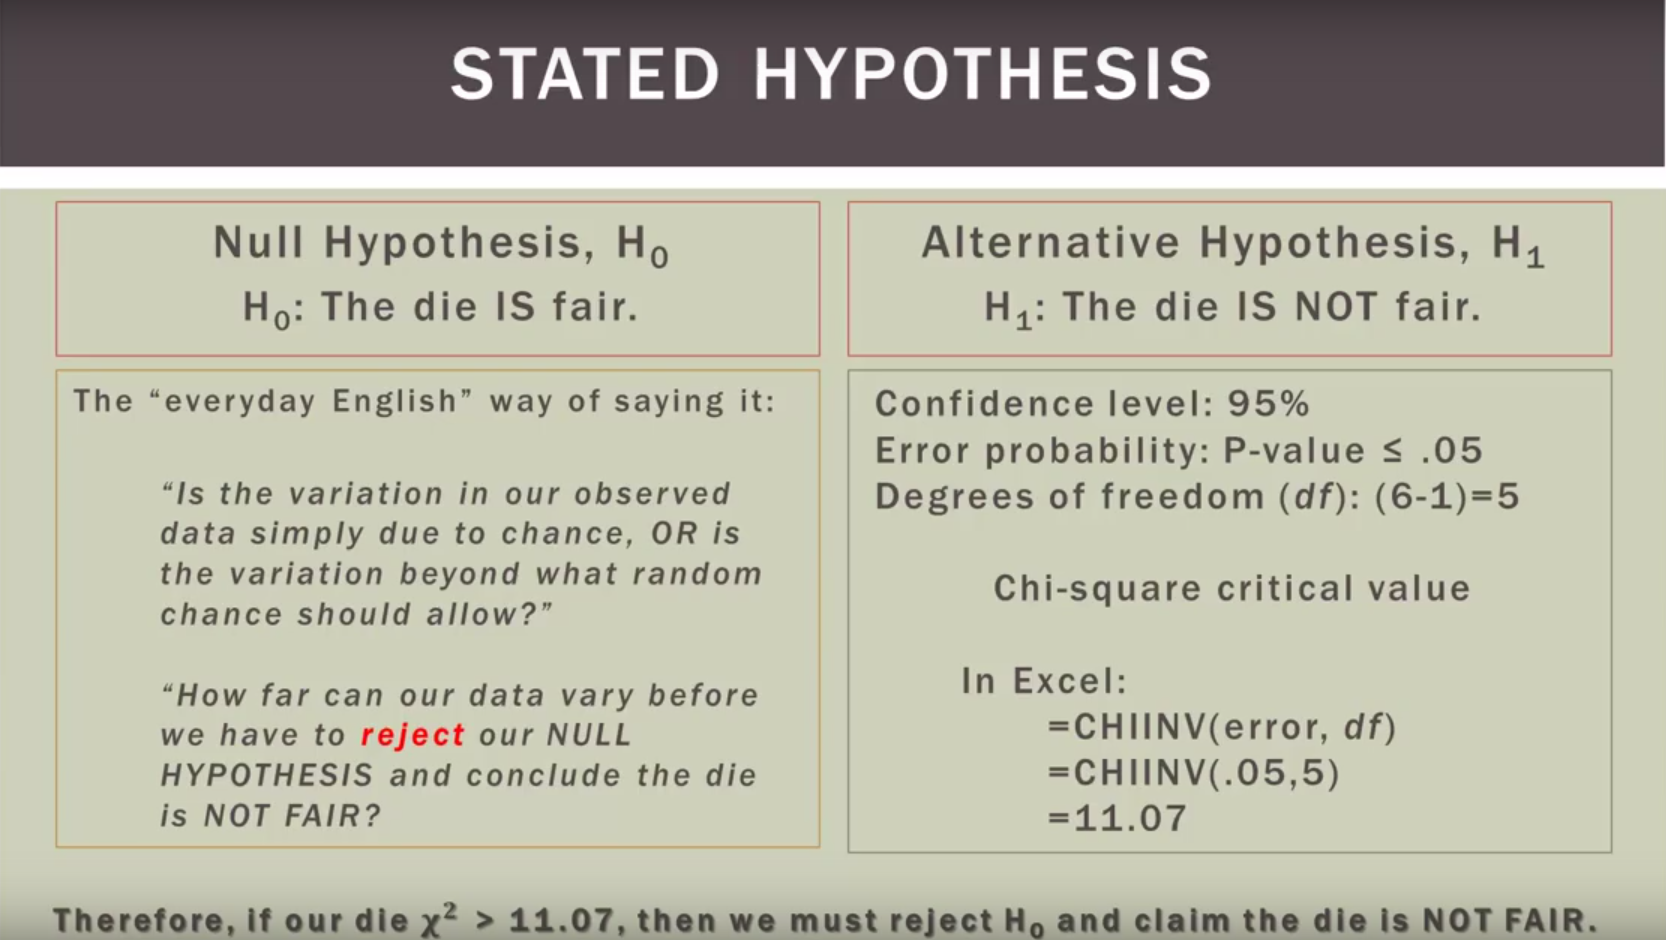


In [15]:
#Lets apply chi-squared statistical test (χ2) to the set to compare WomenandChildren to survival rate
compute_chi2(titanic_data_age_valid,"WomenandChildren","Survived")
print("Predictive Model accuracy = {0:.2f}% \
    ".format((titanic_data_age_valid['WomenandChildren']  == titanic_data_age_valid.Survived).mean()*100))

Frequency table
Survived            0    1
WomenandChildren          
0                 344   72
1                  80  218
======WomenandChildren vs Survived========
ChiSquare test statistic   = 130.807799
p-value                    = 0.00000000000000000000
Critical Value (.05 alpha) = 0.103
Predictive Model accuracy = 78.71%     


chi-square statistic has a very high number 130.80 > critical value 0.103 and p value which is significantly zero.<br\>
Thus we can reject out null hypothesis Ho (chi square statistics > critical value) and conclude our alternate hypothesis H1 is 
fair with ~99.99% confidence (p value ~0.00)
Thus the data provide convincing evidence that the passenger (woman or children) and their survival are related. <br\>
Predictive Model accuracy = 78.71%  

Lets analyse how much impact does Sex alone has

In [16]:
#Creating new column named gender having value=0 if female , 1 if male
titanic_data["gender"] = titanic_data["Sex"].apply(lambda x: 0 if (x =='female') else 1)

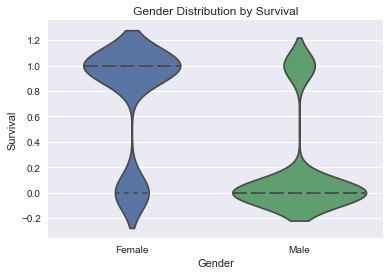

In [17]:
p = sns.violinplot(data = titanic_data, x = 'gender', y = 'Survived',inner="quart")
p.set(title = 'Gender Distribution by Survival', 
        xlabel = 'Gender', 
        ylabel = 'Survival',
        xticklabels = ['Female', 'Male']);

The above plot clearly shows survival rate of female far exceeds male 

In [18]:
#Lets apply chi-squared statistical test (χ2) to the set to compare gender to survival rate
compute_chi2(titanic_data,"gender","Survived")

Frequency table
Survived    0    1
gender            
0          81  233
1         468  109
======gender vs Survived========
ChiSquare test statistic   = 92.702447
p-value                    = 0.00000000000000000000
Critical Value (.05 alpha) = 0.103


Q1. What factors made people more likely to survive? (Factors like: age, sex, and class can be analyzed.)<br/>
To what extent each factor affected the survival?<br/>
    1. Is there a statistical difference between the overall survival rate and the survival rate for men and women? <br/>
Answer:- Yes, there is a statistical difference as explained below:- <br/>
From the frequency table, <br/>
We can see a magnitude difference of women and children that survived compared to those who didn't. <br/>
Women and children survived is almost 2.6 times higher than women and children who died. <br/>
On the contrary, adult men is about 5 times higher between not survived and survived. <br/>
Survival rate for women is 74.20 percent whereas for men it is 18.89 percent.

Lets start to answer Q1.2 <br/>
Is there a statistical difference between the overall survival rate and the survival rate for passengers in each class?


In [19]:
titanic_data.groupby('Pclass').Fare.mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

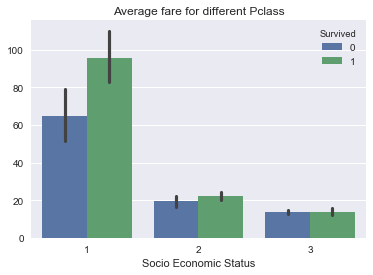

In [20]:
sns.barplot(x="Pclass", y="Fare", hue="Survived", data=titanic_data, estimator = np.mean)
plt.ylabel("")
plt.xlabel("Socio Economic Status")
plt.title("Average fare for different Pclass");

The socio economy status is clearly represented by Pclass, as we see the mean fare vairation across Pclass <br\>
There is huge difference between upper class and middle/lower class fare prices which is as expected <br/>
However, the survival rate for upper/middle class is higher than lower class Pclass=3.
Also the survival rate within the class also is getting affected by the fare. This might be due to cabins or other amenties within that cases or fare represent cumulative amount of entire group travelling together. We will analyse this factor later

However there is not enough substantiatial data available to correlate fare with survival rate. The Cabin information is also missing for 77% of the records (missing_cabindata_rows/len(titanic_data['Cabin']). <br\>
Hence these variables will not be explored further. <br\>
Lets try to find out if there is any correlation between Pclass and Survived and 
how much it is impacted by Sex and Age <br\>

In [21]:
#Lets apply chi-squared statistical test (χ2) to the set to compare Pclass to survival rate
compute_chi2(titanic_data,"Pclass","Survived")

Frequency table
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
======Pclass vs Survived========
ChiSquare test statistic   = 30.873699
p-value                    = 0.00000002753785632029
Critical Value (.05 alpha) = 0.103


chi-square statistic has a very high number 30.87 > critical value 0.103 and p value which is significantly zero.<br\>
Thus we can reject out null hypothesis Ho (chi square statistics > critical value) and conclude our alternate hypothesis H1 is 
fair with ~99.98% confidence (p value ~0.00)
Thus the data provide convincing evidence that the passenger's PClass and their survival are related. <br\>

In [22]:
print("Survival Rate for PClass=1 = {0:.2f} percent".format((136/len(titanic_data[titanic_data['Pclass'] ==1].Survived))*100))
print("Survival Rate for PClass=2 = {0:.2f} percent".format((87/len(titanic_data[titanic_data['Pclass']  ==2].Survived))*100))
print("Survival Rate for PClass=3 = {0:.2f} percent".format((119/len(titanic_data[titanic_data['Pclass'] ==3].Survived))*100))

Survival Rate for PClass=1 = 62.96 percent
Survival Rate for PClass=2 = 47.28 percent
Survival Rate for PClass=3 = 24.24 percent


62.96 percent of the 1st class passengers survived whereas, 47.28 percent of the 2nd class passengers survived and only 24.23 percent of the 3rd class passengers survived

In [23]:
'''
This function to compute the correlation between the two
input variables. 
Each input is either a NumPy array or a Pandas Series.
correlation = average of (x in standard units) times (y in standard units)
'''
def correlation(x, y):
    x_std = x.std(ddof=0)
    x_mean = x.mean()
    y_std = y.std(ddof=0)
    y_mean = y.mean()
    
    std_x = (x - x_mean)/x_std
    std_y = (y - y_mean)/y_std
    correlation = (std_x * std_y).mean()
    return correlation
print("Correlation between PClass and Survived = {0:.2f} percent \
    ".format(correlation(titanic_data['Pclass'], titanic_data['Survived'])))

Correlation between PClass and Survived = -0.34 percent     


Negative correlation is a relationship between two variables in which one variable increases as the other decreases,
and vice versa. <br\>
The correlation check -0.34 percent shows that lesser number of third class passengers survived as compared to the second class and lessser number of second class pasengers survived as compared to the third class passengers

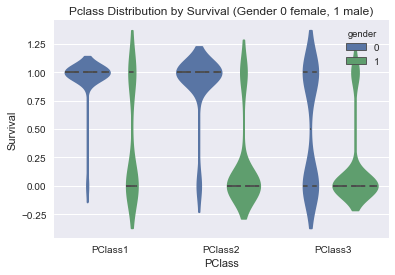

In [24]:
p = sns.violinplot(data = titanic_data, x = 'Pclass', y = 'Survived',hue = "gender", inner="quart")
p.set(title = 'Pclass Distribution by Survival (Gender 0 female, 1 male)', 
        xlabel = 'PClass', 
        ylabel = 'Survival',
        xticklabels = ['PClass1', 'PClass2','PClass3'],
     );

The above plot shows similar PClass Distribution by Survival for male and female.<br\>
Lets see affect of age on the distribution. 

Investigating whether if you are traveling alone or with family would affect the survival rate.

In [25]:
##Number of passengers who are not travelling alone
not_alone = (titanic_data[(titanic_data['SibSp']>0) | (titanic_data['Parch']>0)])

##Number of passengers who are travelling alone

alone = (titanic_data[(titanic_data['SibSp']==0) & (titanic_data['Parch']==0)])

not_alone_survived = (titanic_data[((titanic_data['SibSp']>0) | (titanic_data['Parch']>0)) & titanic_data['Survived']])
alone_survived = (titanic_data[((titanic_data['SibSp']==0) & (titanic_data['Parch']==0)) & titanic_data['Survived']])

##Percentages of passengers who are travelling alone/are not travelling alone who survived/did not survive

percent_not_alone_survived = len(not_alone_survived)* 1.0/len(not_alone)*100
percent_alone_survived = len(alone_survived)* 1.0/len(alone)*100

print ('{0} = {1:0.2f} percent'.format('percent_not_alone_survived', percent_not_alone_survived))
print ('{0} = {1:0.2f} percent'.format('percent_alone_survived', percent_alone_survived))

percent_not_alone_survived = 50.56 percent
percent_alone_survived = 30.35 percent


Above frequency table shows, survial rate is 50.6 percent when you are travelling in group while travelling alone it is  30.4 percent

In [26]:
#Creating new column GroupTravel, GroupTravel=1 if SibSp or Parch > 0 else 0
titanic_data['GroupTravel'] = \
    np.where((titanic_data.SibSp > 0) | (titanic_data.Parch > 0),1,0)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,GroupTravel
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


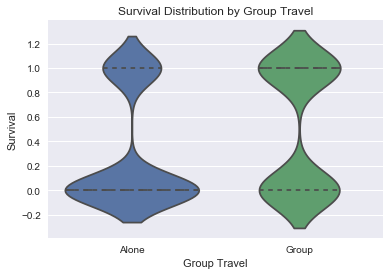

In [27]:
p = sns.violinplot(data = titanic_data, x = 'GroupTravel', y = 'Survived',inner="quart")
p.set(title = 'Survival Distribution by Group Travel', 
        xlabel = 'Group Travel', 
        ylabel = 'Survival', 
        xticklabels = ['Alone', 'Group']);

Above shows survival rate is high when you are travelling in group rather than alone.

In [28]:
#Lets apply chi-squared statistical test (χ2) to the set to compare GroupTravel to survival rate
compute_chi2(titanic_data,"GroupTravel","Survived")

Frequency table
Survived       0    1
GroupTravel          
0            374  163
1            175  179
======GroupTravel vs Survived========
ChiSquare test statistic   = 22.209338
p-value                    = 0.00000244481826853235
Critical Value (.05 alpha) = 0.103


chi-square statistic has a high number 22.21 > critical value 0.103 and p value which is significantly zero.<br\>
Thus we can reject out null hypothesis Ho (chi square statistics > critical value) and conclude our alternate hypothesis H1 is 
fair with ~99.98% confidence (p value ~0.00)
Thus the data provide convincing evidence that the passenger's group travel and their survival are related. <br\>

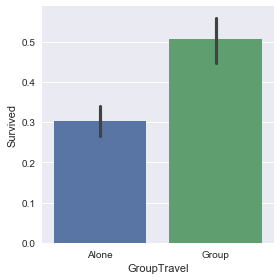

In [29]:
g = sns.factorplot('GroupTravel','Survived', data = titanic_data, kind = 'bar')
g.set_xticklabels(["Alone","Group"]);

# Conclusion

Q1. What factors made people more likely to survive? (Factors like: age, sex, and class can be analyzed.) To what extent each factor affected the survival?<br/>
Q2. Did passengers that traveled alone have a higher chance of survival than passengers that traveled as a family?<br/>

The chi square statistics values derived above concludes that
sex has the strongest effect, passenger class has medium effect and age and group travel have small effect on on survival rate.
Females tend to had more chances to survive over the men; passengers of the 1st class tend to have more chances to survive than 2 class, and 2nd class over the 3rd class. And children tend to survive over the adults and adults over the seniors.



Q3. Does passengers' cabin location help to predict survival?<br/>
The current information is data set is not sufficient to explore this analysis. <br\>
Cabin information is missing from 77.10 percent of the population

# Limitations of the study

It's important to identify and acknowledge the limitation of the study

Correlation doesn't imply causation.<br\>
To get the real causation, we need to conduct the controlled experiment which is most probably not possible.
Using sample instead of the population.

# References
http://www.statisticshowto.com/probability-and-statistics/chi-square/  <br\>
https://seaborn.pydata.org/generated/seaborn.factorplot.html <br\>
https://www.kaggle.com/c/titanic/data